# Use this data to create database of handwritten numbers. 

In [1]:
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from PIL import Image
import h5py
import pandas as pd

2023-04-27 18:03:06.690432: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-27 18:03:06.723298: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-27 18:03:06.723946: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 18:03:07.367626: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Read images

In [2]:
imgs = []
four = np.invert(Image.open("Numbers/Four.jpeg").convert("L").resize((28,28)))
three = np.invert(Image.open("Numbers/Three.jpeg").convert("L").resize((28,28)))
nine = np.invert(Image.open("Numbers/Nine.jpeg").convert("L").resize((28,28)))
imgs = np.expand_dims(nine,0)

In [3]:
imgs[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  76,  15,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0, 139, 255, 133,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

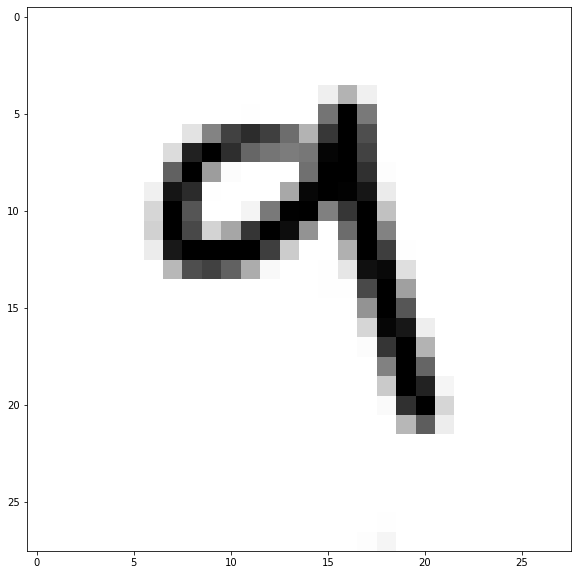

In [4]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
plt.subplot(1, 1, 1)
plt.grid(False)
plt.imshow(imgs[0], cmap=plt.cm.binary)
plt.show()

## Read all images and labels from a list in a file

In [5]:
df = pd.read_csv("Numbers/labels.csv")

In [6]:
print(df)

         file  label
0  Three.jpeg      3
1   Nine.jpeg      9
2   Four.jpeg      4
3    Six.jpeg      6
4  Eight.jpeg      8


In [7]:
imgs = []
labels = []

len(imgs)

0

In [8]:
for file in df['file']:
    in_img = np.invert(Image.open("Numbers/" + file).convert("L").resize((28,28)))
    if len(imgs) == 0:
        imgs = np.expand_dims(in_img,0)
    else:
        in_img = np.expand_dims(in_img,0)
        imgs = np.append(imgs, in_img, axis = 0)

### Labels from dataframe

In [9]:
labels = df['label'].to_numpy()

### Save data to disk

In [10]:
print(labels)
np.savez('mynumber.npz', images=imgs, labels = labels)

[3 9 4 6 8]
